In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib as plt
import random
import igraph as ig

In [8]:
import random

# Number of nodes
num_nodes = 20

# Create an empty list to store edges
edges = []

# Generate random edges using a loop
for i in range(num_nodes):
    # Generate a random number of edges for the current node
    num_edges = random.randint(1, 5)  # You can adjust the range as needed

    # Generate random edges to other nodes
    for _ in range(num_edges):
        target_node = random.randint(1, num_nodes)
        
        # Ensure the edge is not a self-loop
        while target_node == i + 1:
            target_node = random.randint(1, num_nodes)
        
        edges.append((i + 1, target_node))

# Print the generated edges
for edge in edges:
    print(edge)

(1, 2)
(1, 20)
(1, 9)
(2, 15)
(2, 14)
(2, 7)
(3, 19)
(3, 12)
(3, 17)
(4, 6)
(5, 18)
(6, 10)
(7, 10)
(7, 11)
(8, 4)
(9, 8)
(9, 16)
(9, 1)
(9, 16)
(9, 15)
(10, 2)
(11, 8)
(11, 15)
(12, 3)
(13, 6)
(13, 2)
(13, 2)
(14, 17)
(14, 3)
(15, 5)
(16, 5)
(16, 18)
(16, 8)
(16, 14)
(16, 6)
(17, 9)
(17, 11)
(17, 9)
(17, 6)
(18, 4)
(18, 19)
(18, 19)
(19, 11)
(20, 19)
(20, 1)
(20, 4)
(20, 2)
(20, 1)


In [9]:
# Create a pandas DataFrame from the edges list
df = pd.DataFrame(edges, columns=['Source', 'Target'])

# Print the DataFrame
print(df)

    Source  Target
0        1       2
1        1      20
2        1       9
3        2      15
4        2      14
5        2       7
6        3      19
7        3      12
8        3      17
9        4       6
10       5      18
11       6      10
12       7      10
13       7      11
14       8       4
15       9       8
16       9      16
17       9       1
18       9      16
19       9      15
20      10       2
21      11       8
22      11      15
23      12       3
24      13       6
25      13       2
26      13       2
27      14      17
28      14       3
29      15       5
30      16       5
31      16      18
32      16       8
33      16      14
34      16       6
35      17       9
36      17      11
37      17       9
38      17       6
39      18       4
40      18      19
41      18      19
42      19      11
43      20      19
44      20       1
45      20       4
46      20       2
47      20       1


In [10]:
# Create an igraph Graph from the list of edges
# Assuming your DataFrame has 'Source' and 'Target' columns

# Create an igraph Graph from the DataFrame
edges = list(zip(df['Source'], df['Target']))
G = ig.Graph(edges)

# Define a function to calculate the exclusive neighborhood
def exclusive_neighborhood(graph, v, Vp):
    Nv = set(graph.neighborhood(v))
    NVpll = graph.neighborhood(list(Vp))
    NVp = set([u for sublist in NVpll for u in sublist])
    return Nv - NVp

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(Vsubgraph)
        return
    while len(Vextension) > 0:
        w = random.choice(tuple(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = exclusive_neighborhood(graph, w, Vsubgraph)
        VpExtension = Vextension | set([u for u in NexclwVsubgraph if u > v])
        extend_subgraph(graph, Vsubgraph | set([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs
def enumerate_subgraphs(graph, k):
    k_subgraphs = []
    for vertex_obj in graph.vs:
        v = vertex_obj.index
        Vextension = set([u for u in graph.neighbors(v) if u > v])
        extend_subgraph(graph, set([v]), Vextension, v, k, k_subgraphs)
    return k_subgraphs

# Enumerate subgraphs of size 4
sgset = enumerate_subgraphs(G, 4)
subgraph_isoclass_list = [G.subgraph(list(sg)).isoclass() for sg in sgset]

# Count occurrences of subgraph isoclasses
from collections import Counter
counter = Counter(subgraph_isoclass_list)
print(counter)

Counter({6: 297, 4: 93, 7: 38, 8: 15})


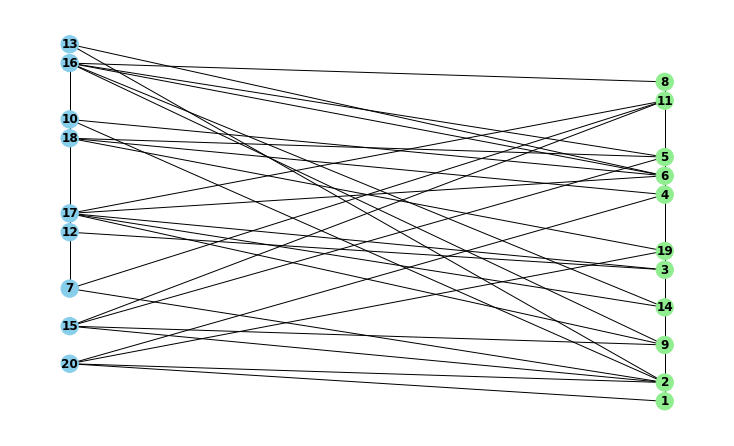

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame 'df' with columns 'Source' and 'Target'

# Create a bipartite graph using NetworkX
B = nx.Graph()

# Add 'Source' nodes to one node set and 'Target' nodes to another node set
for index, row in df.iterrows():
    B.add_node(row['Source'], bipartite=0)
    B.add_node(row['Target'], bipartite=1)
    B.add_edge(row['Source'], row['Target'])

# Draw the bipartite graph using Matplotlib
plt.figure(figsize=(10, 6))  # Set the size of the figure
pos = {node: (0, i) for i, node in enumerate(B.nodes) if B.nodes[node]['bipartite'] == 0}
pos.update({node: (1, i) for i, node in enumerate(B.nodes) if B.nodes[node]['bipartite'] == 1})

# Assign node colors based on bipartite sets
node_colors = ['skyblue' if B.nodes[node]['bipartite'] == 0 else 'lightgreen' for node in B.nodes]

nx.draw(B, pos, with_labels=True, font_weight='bold', node_size=300, node_color=node_colors)
plt.show()
